# Introduction

Good morning, afternoon, and evening
whatever the time is for you: Welcome.
    
I hope you like my project because I have put a lot of effort through it. Moreover, I want to thank my session leader because he helped me a lot with it.

So, let's start >>>>>>


First, let me introduce the dataset.

The dataset that you will be wrangling, analyzing, and visualizing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 
WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.


Moreover, this work speaks about data wrangling, obviously, where it consists of 3 parts:
    - Gathering data
    - Assessing data
    - Cleaning
    
in addition, we will visuals the data at the end.


Then, let's dive into the work:

In [16]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import json

In [17]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

## Gathering Data:
we have to import three data files:
- twitter_archive_anhanced.csv
- image-predictions.tsv
- tweet_json

from the resources section

In [18]:
#import twitter archive enhanced lite:
#Read CSV
t_ar = pd.read_csv('twitter-archive-enhanced.csv')
t_ar.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [19]:
#import image-predictions: read fiLe online
#tsv fiLe is a text fiLe spreoted by space..
img_url= pd.read_csv('https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5bf60fe7_image-predictions/image-predictions.tsv', sep='\t')
img_url.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
#import tweetjson file: 
#convert json to datafrome.. 
df_list = []
with open('tweet-json', 'r') as file:
    for j in file:
        data = json.loads(j)
        
        # Append to List of dictionaries 
        df_list.append({'tweet_id': data['id'],
                        #'user_name': data['user']['name'],
                        'retweet_count': data['retweet_count'],
                        "favorite_count": data['favorite_count'],
                        #'text': data['full_text'],
                        #'Location': data['user']['Location']
                       })


        
# Create a datoFrame
data_df = pd.DataFrame(df_list, columns = ['tweet_id' ,'retweet_count', 'favorite_count'])
data_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
print(type(data), data.keys())

<class 'dict'> dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing Data:

In [23]:

#t_ar.sample(20)
#t_ar.text[2]
#t_ar.name.value_counts()
#t_ar.rating_denominator.value_counts()
#t_ar.rating_numerator.value_counts()
#sum(t_ar.tweet_id.duplicated())


In [24]:
t_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
#sum(img_urL. jpg_url.dapLicated())
#img_url.isnuLL().sum()
#img_url.jpg_url.dupLicated().sum()

In [26]:
img_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


As we can see the files contain many quality issues. Furthermore, it need to be tied and cleaned.

`Those quality issues are lots. They were identified with the help of the session lead. Thus, I'll be solving some of them.`

## Quality issues:

#(Twitter archive) table >> t_ar:
- some rows are Retweets.
- wrong datatypes of columns: tweet_id, in_reply_to_status_id,   in_reply_to_user_id and timestamp.
- rating_numerator column has values less than 10 and large numbers such as 1176!.
- rating_denominator column has values other than 10
- name column has an invalid dog names! such as: the, a, an officially, old, one, quite.
- text column: some contains url.
- missing values in some columns.
- source column contains tag.

#image_predication >> img_url:
- wrong datatype of tweet_id column.
- jpg_url colume has some diplicated.
- missing values in some columns.
- p1, p2, p3 coulmns contain underscores of names/labels.
- p1. p2. p3 all get false prediction.

#json fie >> data_df:
- wrong datatype of tweet_id column.



## Tidniss:
- dog stage sprates in many columns!
- data sparates in three different dataframes


## Cleaning Data:
consist three steps:
- defining
- coding to solve the issue
- testing

Here, we will be solving each issue individually, after which, the three data files will be combined.

In [28]:
## making copy of the dataframes:

t_ar_clean= t_ar.copy()
img_url_clean = img_url.copy()
data_df_clean = data_df.copy()

In [29]:
t_ar_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### define1: removing retweets

In [30]:
# define1: removing retweets
t_ar_clean['retweeted_status_id'].notnull().sum()

181

#### code1


In [31]:
#code1:
t_ar_clean = t_ar_clean[t_ar_clean['retweeted_status_id'].isnull()]



#### test1

In [32]:
#test1:
t_ar_clean['retweeted_status_id'].notnull().sum()

0

#### define2: remove roting_numerator that has value Less than 10 or more than 14:

In [33]:
#define2: remove roting_numerator that has value Less than 10 or more than 14:
print(t_ar_clean.rating_numerator.min(),t_ar_clean.rating_numerator.max())


0 1776


#### code2

In [34]:
# code2:
t_ar_clean = t_ar_clean[t_ar_clean.rating_numerator.between(10,14)]

#### test2

In [35]:
#test2:
print(t_ar_clean.rating_numerator.min(),t_ar_clean.rating_numerator.max())


10 14


#### define3

In [36]:
#define3:
t_ar_clean.rating_denominator.value_counts()

10    1717
15       1
Name: rating_denominator, dtype: int64

#### code3

In [37]:
#code3:
t_ar_clean['rating_denominator']= 10

#### test3

In [38]:
# test3:
t_ar_clean.rating_denominator.value_counts()

10    1718
Name: rating_denominator, dtype: int64

#### define4

In [39]:
# define4:
t_ar_clean.name.value_counts()

None          521
a              29
Charlie        11
Lucy           10
Cooper          9
Oliver          9
Tucker          8
Winston         7
Sadie           7
Penny           7
Lola            6
Koda            6
Bo              6
Daisy           6
Louis           5
Stanley         5
Oscar           5
Bentley         5
Jax             5
Bailey          5
Leo             5
the             5
Toby            5
Milo            5
Scooter         4
Cassie          4
Boomer          4
Bear            4
Dave            4
Finn            4
             ... 
Shelby          1
Farfle          1
Ferg            1
Kobe            1
Wafer           1
Al              1
Mauve           1
Harlso          1
Champ           1
Coopson         1
Angel           1
Brat            1
Petrick         1
Rumble          1
Snickers        1
Sailer          1
Robin           1
Kallie          1
Dallas          1
Filup           1
Zara            1
Gert            1
Ito             1
Rey             1
Tess      

#### code4: remove invaLied name ['a','an', 'my', 'his','the','such', 'old']


In [40]:
#code4: remove invaLied name ['a','an', 'my', 'his','the','such', 'old']
index = ['a','an', 'my', 'his','the','such', 'old', 'None']
for i in index:
    t_ar_clean = t_ar_clean[t_ar_clean.name != i ]

#### test4

In [41]:
# test4: t_ar_clean.nase.value_counts()
t_ar_clean.name.value_counts()

Charlie       11
Lucy          10
Oliver         9
Cooper         9
Tucker         8
Sadie          7
Penny          7
Winston        7
Daisy          6
Koda           6
Bo             6
Lola           6
Louis          5
Stanley        5
Bentley        5
Jax            5
Toby           5
Leo            5
Bailey         5
Milo           5
Oscar          5
Boomer         4
Winnie         4
Jeffrey        4
Finn           4
Rusty          4
Cassie         4
Reggie         4
Bella          4
Oakley         4
              ..
Akumi          1
Halo           1
Shelby         1
Farfle         1
Ferg           1
Kobe           1
Wafer          1
Al             1
Angel          1
Brat           1
Jareld         1
Kyro           1
Patch          1
Shikha         1
Hall           1
Benny          1
Rumble         1
Snickers       1
Sailer         1
Robin          1
Dallas         1
Filup          1
Zara           1
Gert           1
Ito            1
Rey            1
Tess           1
Monster       

#### define5: merge columns (doggo,floofer,pupper,puppo) to one column with code5 and test5

In [42]:
#define5: merge columns (doggo,floofer,pupper,puppo) to one column

#code5:
j = ['doggo','floofer','pupper','puppo']

t_ar_clean['dog_stage'] = t_ar_clean[j[0]]+ ''+t_ar_clean[j[1]]+ ''+t_ar_clean[j[2]]+ ''+t_ar_clean[j[3]]
t_ar_clean['dog_stage'] = t_ar_clean['dog_stage'].str.replace('None','')
t_ar_clean['dog_stage'] = t_ar_clean['dog_stage'].str.replace('doggo','doggo,')

t_ar_clean['dog_stage1'], t_ar_clean['dog_stage2'] = t_ar_clean['dog_stage'].str.split(',').str
t_ar_clean['dog_stage1'] = t_ar_clean['dog_stage1'].replace('','None')
t_ar_clean['dog_stage2'] = t_ar_clean['dog_stage2'].replace('','None')

#test5:
t_ar_clean.dog_stage1.value_counts() 
#t_ar_clean.dog_stage.isnull().sum()

None       999
pupper      96
doggo       42
puppo       15
floofer      5
Name: dog_stage1, dtype: int64

#### define6: remove TAGs from source column

In [43]:
#define6: remove TAGs from source column:

t_ar_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1097
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          41
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       11
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       8
Name: source, dtype: int64

#### code6

In [44]:
#code6:
t_ar_clean['source'] = t_ar_clean['source'].str.extract('^<a.+>(.+)</a>$')




#### test6

In [45]:
#test6:
t_ar_clean.source.sample()


259    Twitter for iPhone
Name: source, dtype: object

In [46]:
img_url.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### define7

In [47]:
#define7:
com= "p1_dog == False and p2_dog == False and p3_dog == False"
len(img_url_clean.query(com).index)

324

#### code7

In [49]:
#code7:
img_url_clean.drop(img_url_clean.query(com).index, inplace= True)



#### test7

In [51]:
#test7:
len(img_url_clean.query(com).index)

0

#### double_test7

In [52]:
#double_test7:
img_url_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1631,805520635690676224,https://pbs.twimg.com/media/Cy3IvdZXgAUoEaj.jpg,1,malinois,0.643147,True,German_shepherd,0.186642,True,Border_terrier,0.109345,True
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
497,675798442703122432,https://pbs.twimg.com/media/CWDrGH4UYAARoq_.jpg,1,beagle,0.681218,True,basset,0.125121,True,boxer,0.080398,True
483,675432746517426176,https://pbs.twimg.com/media/CV-ef64WoAAbh0I.jpg,1,Labrador_retriever,0.986548,True,golden_retriever,0.008862,True,Chihuahua,0.000694,True
1519,787717603741622272,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,3,German_shepherd,0.992339,True,malinois,0.004920,True,kelpie,0.000853,True


#### define8

In [53]:
#define8:
img_url_clean.p1.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

#### code8

In [54]:
#code8:
img_url_clean.p1 = img_url_clean.p1.str.replace('-', ' ')
img_url_clean.p2 = img_url_clean.p2.str.replace('-', ' ')
img_url_clean.p3 = img_url_clean.p3.str.replace('-', ' ')



#### test8

In [55]:
#tesssst8:
img_url_clean.p1.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [56]:
# Finally, merging dataframes (tidieness):

df_merge = pd.merge(t_ar_clean, img_url_clean, on= 'tweet_id')
df_last = pd.merge(df_merge, data_df_clean, on='tweet_id')
df_last.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
3,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short haired_pointer,0.175219,True,9774,41048
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041


In [57]:
noneed_columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']
df_last.drop(noneed_columns, axis=1,inplace= True)

In [58]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1019 entries, 0 to 1018
Data columns (total 22 columns):
tweet_id              1019 non-null int64
timestamp             1019 non-null object
source                1019 non-null object
text                  1019 non-null object
rating_numerator      1019 non-null int64
rating_denominator    1019 non-null int64
name                  1019 non-null object
dog_stage1            1019 non-null object
dog_stage2            36 non-null object
jpg_url               1019 non-null object
img_num               1019 non-null int64
p1                    1019 non-null object
p1_conf               1019 non-null float64
p1_dog                1019 non-null bool
p2                    1019 non-null object
p2_conf               1019 non-null float64
p2_dog                1019 non-null bool
p3                    1019 non-null object
p3_conf               1019 non-null float64
p3_dog                1019 non-null bool
retweet_count         1019 non-null int64


In [59]:
df_last.to_csv('twitter-archive-clean.csv', index= False)

## Visualizing Data:

### Act report:

For this analysis the data is gathered from three different sources. WeRateDogs gave Udacity exclusive access to their Twitter archive for this project in the form of a csv file. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. Each tweet image was run through a convolutional neural network with the purpose of analyzing the images to correctly identify the dog breeds. The convolutional neural network predictions were programmatically downloaded using the Requests Python library as a tsv file. And finally, using the tweet apj, the json object of each tweet is gathered and saved on json data file. Each tweet's entire set of JSON data file consist all information about its such as created time, favorite count and retweet count etc

------------------------------------------------------------------------

` in the section below, we will handle some insight about the dog rates`

`First: importing the data.`

In [60]:
df_last = pd.read_csv('twitter-archive-clean.csv')
df_last.timestamp = pd.to_datetime(df_last.timestamp)
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 22 columns):
tweet_id              1019 non-null int64
timestamp             1019 non-null datetime64[ns]
source                1019 non-null object
text                  1019 non-null object
rating_numerator      1019 non-null int64
rating_denominator    1019 non-null int64
name                  1019 non-null object
dog_stage1            1019 non-null object
dog_stage2            36 non-null object
jpg_url               1019 non-null object
img_num               1019 non-null int64
p1                    1019 non-null object
p1_conf               1019 non-null float64
p1_dog                1019 non-null bool
p2                    1019 non-null object
p2_conf               1019 non-null float64
p2_dog                1019 non-null bool
p3                    1019 non-null object
p3_conf               1019 non-null float64
p3_dog                1019 non-null bool
retweet_count         1019 non-nul

## Q1: How was the tweeting intensity over time? 

In [61]:
# Checking the sense of making line graph for mounths:

df_last.timestamp.dt.to_period('M').nunique()

22

In [ ]:
# does make sense

Text(0.5,1,'Count of tweets over months')

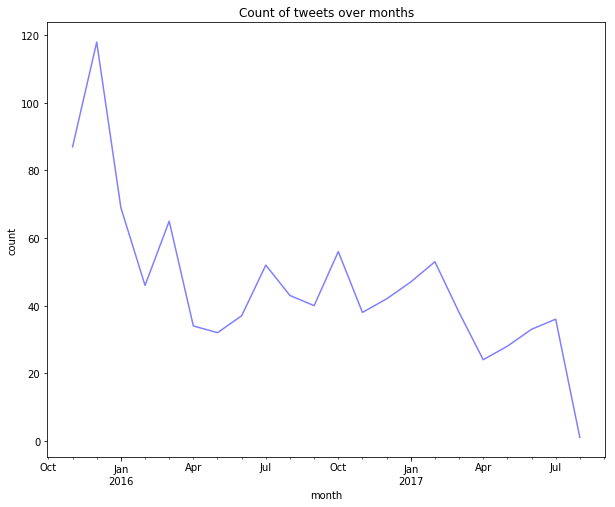

In [62]:
#line graph for tweeting in months:
df_last.groupby(df_last.timestamp.dt.to_period('M'))['tweet_id'].count().plot(kind= 'line', figsize= (10,8), color= 'b', alpha= 0.5)
plt.xlabel('month')
plt.ylabel('count')
plt.title('Count of tweets over months')

As we can see from the graph the tweeting between Oct 2015 till Aug 2017, was intense and high at the beginning. However, tweeting count started a hard reduction in its number between Dec and Feb 2015/16. Furthermore, the peak of tweeting was at Dec 2015 and the lowest tweeting count was at Aug 2017.

## Q2: What are the most common dogs name? 

In [132]:
df_last.name.value_counts()

Lucy           10
Charlie        10
Cooper          9
Oliver          8
Tucker          8
Penny           7
Winston         6
Koda            6
Daisy           6
Sadie           6
Lola            5
Leo             5
Stanley         5
Jax             5
Bo              5
Oakley          4
Louis           4
Milo            4
Winnie          4
Toby            4
Duke            4
Bentley         4
Rusty           4
Bear            4
Reggie          4
Jack            4
Scooter         4
Finn            4
Cassie          4
Dave            4
               ..
Maude           1
Reptar          1
Brooks          1
Kobe            1
Mitch           1
infuriating     1
Benji           1
Emma            1
Harry           1
Ralpher         1
Kona            1
Kramer          1
Lolo            1
Griswold        1
Willow          1
Barclay         1
Sid             1
Major           1
Stefan          1
Rhino           1
Ralphson        1
Carper          1
Mason           1
Liam            1
Oreo      

Text(0.5,1,'common dogs names')

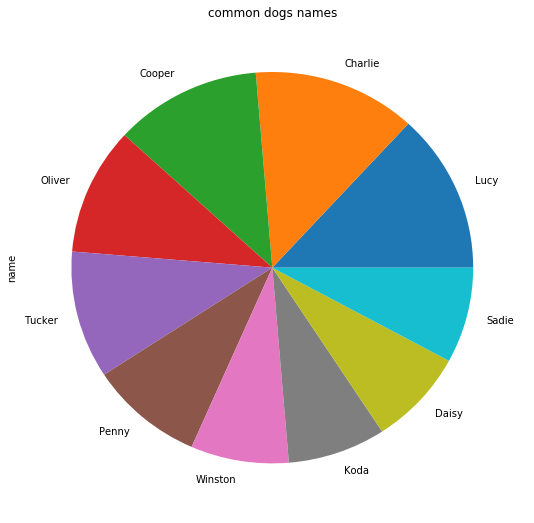

In [135]:
# Most common dogs names:
df_last.name.value_counts().head(10).plot(kind= 'pie', figsize= (9,9))
# taking the most common only (> 5)
plt.title('common dogs names')

  From the pie chart, we can see that the most common dog names where ten. Four of which takes the half of the pie. Moreover, the most common dog name is Charline.

## Q3: How were the dogs' popularity in terms of retweeting and favoriting?

Text(0.5,1,'most popular dogs')

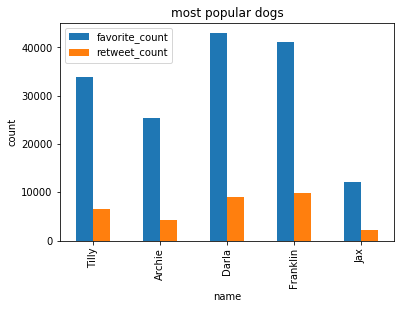

In [138]:
# Dogs popularity:
df_last.head().plot(kind= 'bar', x= 'name', y=['favorite_count', 'retweet_count'])
plt.xlabel('name')
plt.ylabel('count')
plt.title('most popular dogs')

In terms of favorite count, Darla and Franklin were the most popular respectively. On the other in retweet count, it's vice versa where Franklin has the highest count then Darla. Finally, the least popular one in both retweet and favorite was Jax.

__________________________________________________________________________